## Introduction & Instruction

As an introduction to computer vision, you are to perform the simple task of mood detection. Mood detection is the process of identifying and understanding a person's current emotional state. It can be done through a variety of methods, but we will focus on Facial expression recognition. Facial expressions are one of the most important cues for understanding human emotions. Mood detection systems can use computer vision techniques to analyze facial features and identify specific expressions, such as happiness, sadness, anger, you must attain the following objectives:

- Recognize when a face is yours or not.
- Recognize only your mood (happy, sad, angry, or confused).
- Perform testing to show the performance of your implementation.

In [1]:
import os
import cv2

image_path = 'images'
raw_video_path = 'vid'
moods = os.listdir(image_path)


def video_conv(video_files, save_folder):
    face_cascade = cv2.CascadeClassifier(r"haarcascade_frontalface_default.xml")
    j = 1 #counter of saved images
    
    for file in video_files:
        print("Extracting",file)
        video = cv2.VideoCapture(file)
        i = 0
        while True:
            i += 1
            ret, frame = video.read()
            if i!=2: continue
            i = 0
            if not ret:
                break
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(gray, 1.5, 5)

            for (x, y, w, h) in faces:
                roi_gray = frame[y:y + h, x:x + w]
                roi = cv2.resize(roi_gray, (224,224), interpolation=cv2.INTER_LINEAR)
                cv2.imwrite(os.path.join(save_folder, f'image_{j}.jpg'), roi)
                j += 1
        video.release()

for mood in moods:
  print(mood)
  files = os.listdir(f'{raw_video_path}/{mood}')
  video_files = [os.path.join(raw_video_path,mood,file) for file in files if file.endswith(('.mp4'))]
  video_conv(video_files,f'{image_path}/{mood}')

angry
Extracting vid\angry\angry.mp4
confused
Extracting vid\confused\confused.mp4
happy
Extracting vid\happy\happy.mp4
sad
Extracting vid\sad\sad.mp4


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255,
                         validation_split= 0.2,
                         )

train_gen = idg.flow_from_directory('images', batch_size=32, target_size=(224,224), class_mode='categorical', subset='training')
test_gen = idg.flow_from_directory('images', batch_size=32, target_size=(224,224), class_mode='categorical', subset='validation')

Found 140 images belonging to 4 classes.
Found 33 images belonging to 4 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model_1 = Sequential()

model_1.add(Conv2D(32, (2,2), strides=1, input_shape = (224,224,3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(64, (2,2), strides=1))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Flatten())
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(4, activation = 'softmax'))

model_1.summary()

d:\Apps\Anaconda3\envs\krys\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 223, 223, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 110, 110, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 53, 53, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,575,940 (21.27 MB)

 Trainable params: 5,575,940 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(train_gen, validation_data=test_gen, epochs=20)

Epoch 1/20


d:\Apps\Anaconda3\envs\krys\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4568 - loss: 1.6012 - val_accuracy: 0.2727 - val_loss: 1.3632
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3772 - loss: 1.2877 - val_accuracy: 0.5758 - val_loss: 1.3081
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5148 - loss: 1.1741 - val_accuracy: 0.5758 - val_loss: 1.2912
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5483 - loss: 1.1118 - val_accuracy: 0.5758 - val_loss: 1.3526
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5587 - loss: 1.0578 - val_accuracy: 0.5758 - val_loss: 1.1675
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5661 - loss: 0.9909 - val_accuracy: 0.6970 - val_loss: 0.9089
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6620 - loss: 0.8274 - val_accuracy: 0.9394 - val_loss: 0.6143
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8602 - loss: 0.4422 - val_accuracy: 0.9394 - val_loss: 0.3176
Epoch 9/20
5/5 ━━━━━━━━━━

In [4]:
model_1.save('mood_model.h5')

In [7]:
import cv2
import numpy as np

mood = ['Happy', 'Angry', 'Sad', 'Confused']
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()
    
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    roi = cascade.detectMultiScale(gray, 1.3, 3)
    
    for (x,y,w,h) in roi:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224,224))
        face = np.expand_dims(face, axis=0)
        
        pred = model_1.predict(face)
        label = np.argmax(pred)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, mood[label], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1

Happy
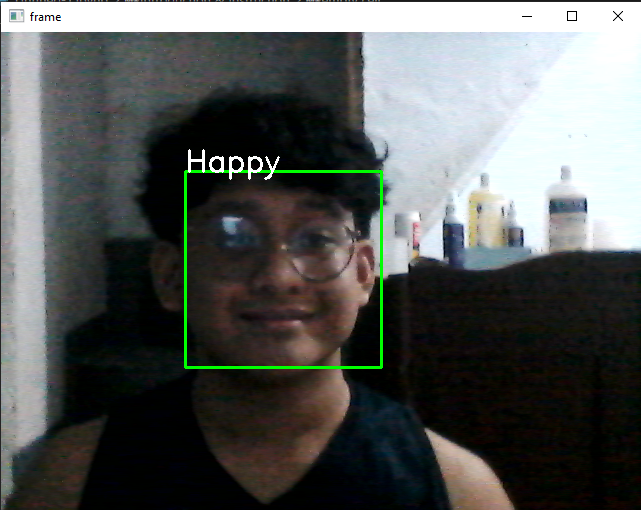

Confused
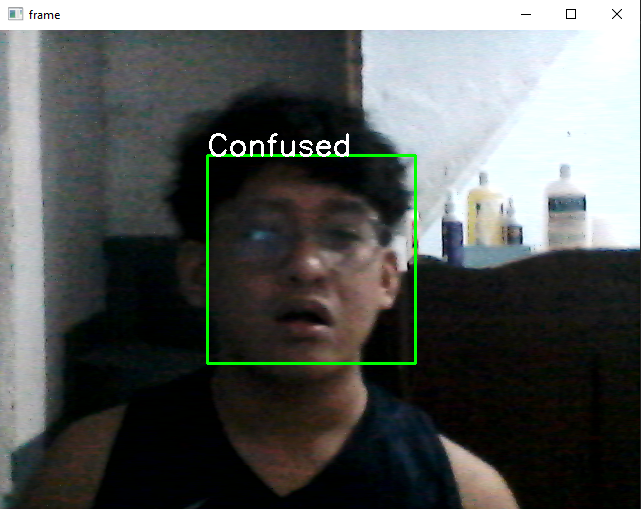

Sad
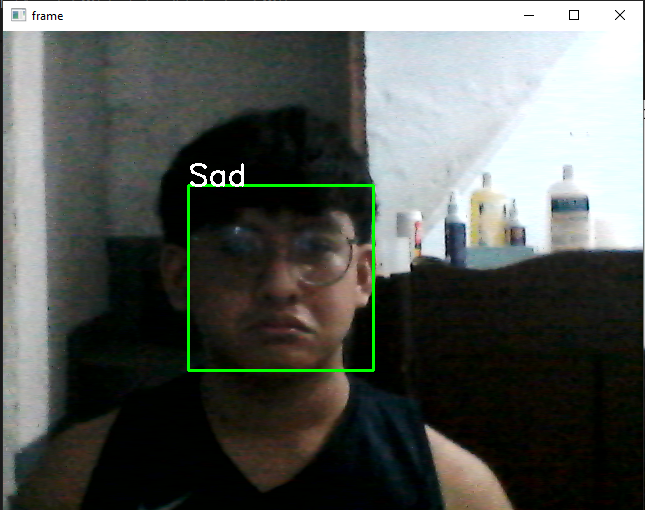

Angry
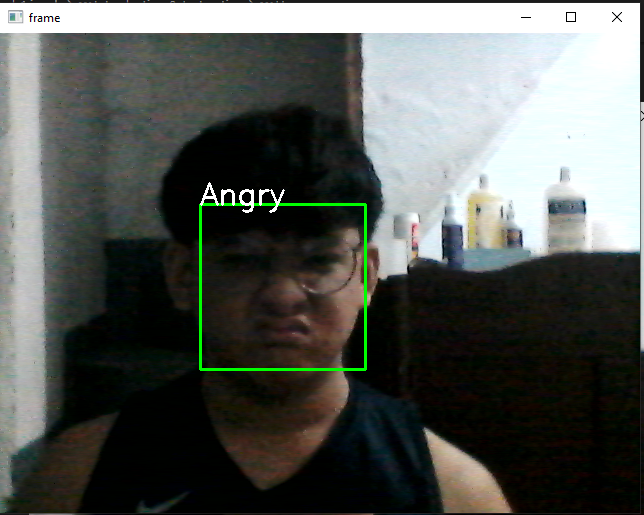